# Graph Algo 

De deux chose l'une ... 

__ Soit on utilise une autre representation plus direct

type matrice d'adjacence
type edgesList


__ Soit on fait un objet graph dans lequel il y aura les méthode "classique"


In [38]:
class graph:
    
    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
    
    def edges(self):
        return self.findedges()
    
    def AddEdge(elf,edge):
        edge = set(edge) 
        (vrtx1, vrtx2) = tuple (edge)
        if (vrtx1 in self.gdict):
            self.gdict[vrtx1].append(vrtx2)
        else:
            elf.gdict[vrtx1]= [vrtx2]
    
    def findedges(self):
        edgename = []
        for v in self.gdict:
            for nextv in self.gdict[v]:
                if {nextv,v} not in edgename:
                    edgename.append({v,nextv})
        return edgename

TestGraph = {    
                "a" : ["b","c"],
                "b" : ["a","d"],
                "c" : ["a","d"],
                "d" : ["e"],
                "e" : ["d"]
            }

g = graph(TestGraph)
print(g.edges())


[{'a', 'b'}, {'c', 'a'}, {'d', 'b'}, {'c', 'd'}, {'d', 'e'}]


In [39]:
def printMatrix(m):
    for r in range(len(m)):
        for c in range(len(m[0])):
            print(m[r][c],end = " ")
        print()


# Matrice Adjacence :
# a b c d e 
# 0 1 2 3 4
s = 5
mat = [[0]*s for i in range(s)]
mat[0][1]=1
mat[0][2]=1

mat[1][0]=1
mat[1][3]=1

mat[2][0]=1
mat[2][3]=1

mat[3][4]=1
mat[4][3]=1

printMatrix(mat)




0 1 1 0 0 
1 0 0 1 0 
1 0 0 1 0 
0 0 0 0 1 
0 0 0 1 0 


Probleme : si le graph est grand ... la matrice contient n^2 élements
plus vraiment faisable ... surtout si elle est majoritairement rempli de 0

Idee => Stocker simplement la liste des connections

## DFS and BFS 

### DFS (Depth first search)

In [40]:
# Matrice List d'Adjacence :
s = 5
mat = [0]*s 
mat[0] = [1,3]
mat[1] = [0,2,4]
mat[2] = [1,4]
mat[3] = [0]
mat[4] = [1,2]

visited = [False] * len(mat)

def dfs(s):
    if visited[s]:
        return # we already visited this node
    visited[s]=True
    #Here some code to process 
    for i in mat[s]:
         dfs(i)

            
dfs(4)
print(visited)

[True, True, True, True, True]


## BFS (breadth-first search) TODO 

In [12]:
# Matrice List d'Adjacence :
s = 5
mat = [0]*s 
mat[0] = [1,3]
mat[1] = [0,2,4]
mat[2] = [1,4]
mat[3] = [0]
mat[4] = [1,2]



def bfs(mat,x):

    visited = [False] * len(mat)
    distance = [0] * len(mat)
    queue = []

    #Starting at node x 
    queue.append(x)
    visited[x] = True
    distance[x] = 0

    while (len(queue)!=0):
        crt = queue.pop(0)
        #print("on pop:", crt, queue)
        for i in mat[crt]:
            #print("adj au node courant ",mat[crt])
            if visited[i]:
                continue
            visited[i] = True
            distance[i] = distance[crt]+1
            #print("on append ",i)
            queue.append(i)

    print(visited)
    
bfs(mat,0)

[True, True, True, True, True]


## Shortest Path

### Bellman-Ford algo

En gros, pour chaque noeud on regarde TOUTES les aretes pour diminuer la distance avec le noeud de départ

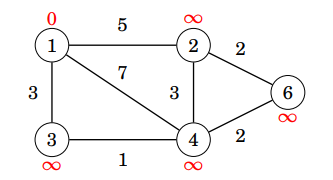

In [22]:
INF = 1e9 + 7
mat = []
mat.append([1,2,5]) # edge from 1 to 2 with weight 5
mat.append([1,4,7])
mat.append([1,3,3])
mat.append([2,5,2])
mat.append([2,4,3])
mat.append([3,4,1])
mat.append([4,5,2])
# pour tester, pas besoin des 2 directions 
n = 5 # nb node

dist = [INF] * n
x = 1 # starting node
dist[x-1] = 0

for _ in range(n):
    for e in mat:
        a = e[0]-1
        b = e[1]-1
        w = e[2]
        #print(a,b,w)
        dist[b] = min(dist[b], dist[a]+w)

print(dist)

0 1 5
0 3 7
0 2 3
1 4 2
1 3 3
2 3 1
3 4 2
0 1 5
0 3 7
0 2 3
1 4 2
1 3 3
2 3 1
3 4 2
0 1 5
0 3 7
0 2 3
1 4 2
1 3 3
2 3 1
3 4 2
0 1 5
0 3 7
0 2 3
1 4 2
1 3 3
2 3 1
3 4 2
0 1 5
0 3 7
0 2 3
1 4 2
1 3 3
2 3 1
3 4 2
[0, 5, 3, 4, 6]


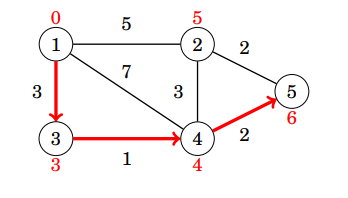

### Dijkstra’s algorithm

Plus rapide que bellman mais on ne peut PAS avoir de poids négatif

l'idée c'est de regarder en premier les aretes qui ont la déjà la min distance :


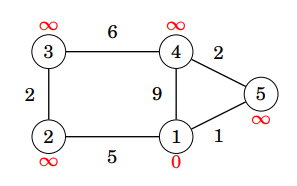

In [12]:
import queue as Q
INF = 1e9 + 7
n = 5 # nb node
mat = [0]*(n+1) 
mat[1] = [(2,5),(4,9),(5,1)]
mat[2] = [(1,5),(3,2)]
mat[3] = [(2,2),(4,6)]
mat[4] = [(3,6),(1,9),(5,2)]
mat[5] = [(1,1),(4,2)]

# pareil pour le test, pas besoin d' arete dans les 2 sens

n = 5 # nb node
dist = [INF] * (n+1) 
dist[0] = -1
visited = [False] * (n+1) 
x = 1 # starting node
dist[x] = 0


#q = [] # queue pour savoir quel noeud on doit process ensuite
#q.append(x)
q = Q.PriorityQueue()
q.put((0,x))
#while (len(q)!=0):
while not q.empty():
    #a = q.pop()
    a = q.get()
    #print(a[1])
    if visited[a[1]]:
        continue
    visited[a[1]] = True
    for e in mat[a[1]]:
        b, w = e
        #print(e,a,b,w)
        if (dist[a[1]]+w < dist[b]):
            dist[b] = dist[a[1]]+w
            #q.append(b)
            q.put((dist[b],b))
print(dist)

[-1, 0, 5, 7, 3, 1]


### Floyd–Warshall algorithm

trouver TOUS les chemins les plus court entre 2 noeuds en O(n^3) grâce à la matrice adjacence

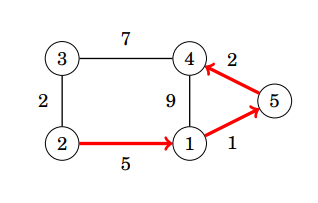

In [25]:
def printMatrix(m):
    for r in range(len(m)):
        for c in range(len(m[0])):
            print(m[r][c],end = " ")
        print()

INF = 1e9+7
# Matrice Adjacence :
# a b c d e 
# 0 1 2 3 4
s = 5
mat = [[0]*s for i in range(s)]
mat[0][1]=5
mat[0][3]=9
mat[0][4]=1
mat[1][0]=5
mat[1][2]=2
mat[2][1]=2
mat[2][3]=7
mat[3][0]=9
mat[3][2]=7
mat[3][4]=2
mat[4][0]=1
mat[4][3]=2
printMatrix(mat)

dist = [[0]*s for i in range(s)] 

#premier round .. on remplit la matrice distance avec les adj
for i in range(s):
    for j in range(s):
        if (i==j):
            dist[i][j]=0
        elif mat[i][j]:
            dist[i][j] = mat[i][j]
        else:
            dist[i][j]=INF
print("")
printMatrix(dist)

# deuxieme round on utilise un DP sur distance pour trouver la plus courte distance
for k in range(s):
    for i in range(s):
        for j in range(s):
            dist[i][j]=min(dist[i][j], dist[i][k]+dist[k][j])

print("")
printMatrix(dist)

0 5 0 9 1 
5 0 2 0 0 
0 2 0 7 0 
9 0 7 0 2 
1 0 0 2 0 

0 5 1000000007.0 9 1 
5 0 2 1000000007.0 1000000007.0 
1000000007.0 2 0 7 1000000007.0 
9 1000000007.0 7 0 2 
1 1000000007.0 1000000007.0 2 0 

0 5 7 3 1 
5 0 2 8 6 
7 2 0 7 8 
3 8 7 0 2 
1 6 8 2 0 
